<a href="https://colab.research.google.com/github/minakshimohanty/Diabetic-Retinopathy-Detection/blob/master/VGG_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
X_train = np.load('/content/drive/My Drive/Capstone 1/train_data_224.npy')
y_train = np.load('/content/drive/My Drive/Capstone 1/train_labels_224.npy')
X_test = np.load('/content/drive/My Drive/Capstone 1/test_data_224.npy')
y_test = np.load('/content/drive/My Drive/Capstone 1/test_labels_224.npy')

In [4]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [0]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [8]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
import keras
model_vgg = VGG19(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
output = model_vgg.layers[-1].output
output = keras.layers.Flatten()(output)
model_vgg = Model(model_vgg.input, output=output)
for layer in model_vgg.layers:
    layer.trainable = False
model_vgg.summary() 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  import sys


In [9]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model =  Sequential()
input_shape=(IMG_HEIGHT,IMG_WIDTH,3)
model.add(model_vgg)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 25088)             20024384  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 2565      
Total params: 33,135,173
Trainable params: 13,110,789
Non-trainable params: 20,024,384
_________________________________

In [10]:
batch_size = 128
epochs = 30
num_classes = 5
X_train_norm = X_train/255
eyetest_train = model.fit(X_train_norm, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.1) 



Train on 2306 samples, validate on 257 samples
Epoch 1/30
2306/2306 [==============================] - 16s 7ms/step - loss: 0.4129 - acc: 0.8299 - val_loss: 0.3322 - val_acc: 0.8763
Epoch 2/30
2306/2306 [==============================] - 7s 3ms/step - loss: 0.3287 - acc: 0.8715 - val_loss: 0.2979 - val_acc: 0.8817
Epoch 3/30
2306/2306 [==============================] - 7s 3ms/step - loss: 0.2980 - acc: 0.8803 - val_loss: 0.2848 - val_acc: 0.8864
Epoch 4/30
2306/2306 [==============================] - 7s 3ms/step - loss: 0.2883 - acc: 0.8842 - val_loss: 0.2793 - val_acc: 0.8763
Epoch 5/30
2306/2306 [==============================] - 7s 3ms/step - loss: 0.2783 - acc: 0.8849 - val_loss: 0.2695 - val_acc: 0.8926
Epoch 6/30
2306/2306 [==============================] - 7s 3ms/step - loss: 0.2744 - acc: 0.8869 - val_loss: 0.2670 - val_acc: 0.8802
Epoch 7/30
2306/2306 [==============================] - 7s 3ms/step - loss: 0.2697 - acc: 0.8898 - val_loss: 0.2580 - val_acc: 0.8988
Epoch 8/30
2

In [11]:
X_test_norm = X_test/255
eyetest_eval = model.evaluate(X_test_norm, y_test, verbose=0)
print('Test loss:', eyetest_eval[0])
print('Test accuracy:', eyetest_eval[1])

Test loss: 0.2452450365478934
Test accuracy: 0.9006369465909512


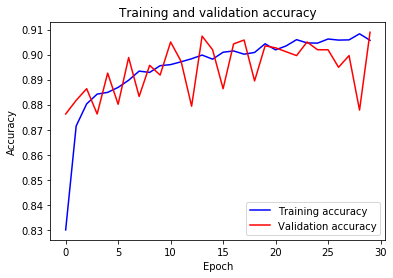

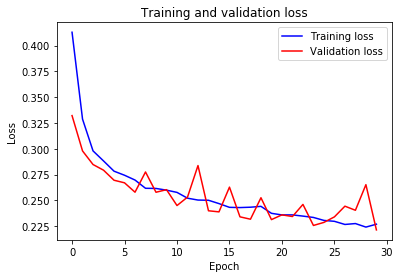

In [12]:
accuracy = eyetest_train.history['acc']
loss = eyetest_train.history['loss']
val_accuracy = eyetest_train.history['val_acc']
val_loss = eyetest_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [0]:
# predictions
y_pred = model.predict(X_test)

In [0]:
def decode(datum):
    return np.argmax(datum)
    

In [0]:
y_pred_decoded = []
for i in range(y_pred.shape[0]):
    y_pred_decoded.append(decode(y_pred[i]))

In [0]:
y_test_decoded = []
for i in range(y_test.shape[0]):
    y_test_decoded.append(decode(y_test[i]))

In [0]:
compare = np.column_stack((y_test_decoded, y_pred_decoded))

In [18]:
from sklearn.metrics import classification_report
#multilabel_confusion_matrix(y_test_decoded, y_pred_decoded)
target_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
print(classification_report(y_test_decoded, y_pred_decoded, target_names=target_names))

                  precision    recall  f1-score   support

           No DR       0.53      1.00      0.69       540
            Mild       0.00      0.00      0.00        98
        Moderate       0.58      0.15      0.24       302
          Severe       0.67      0.04      0.07        55
Proliferative DR       0.00      0.00      0.00       104

        accuracy                           0.54      1099
       macro avg       0.36      0.24      0.20      1099
    weighted avg       0.45      0.54      0.41      1099



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
